In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [2]:
data = pd.read_csv("data/UCI_Credit_Card.csv")

In [3]:
data.shape

(30000, 25)

In [4]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [5]:
def bar_plot(column_name):
    grouped = column_name.groupby(column_name).count()
    bar_df = grouped.to_frame()
    plt.figure(figsize=(20,10))
    plt.bar(bar_df.index, bar_df.iloc[:,0])

In [6]:
def find_unique(df, col_name):
    final_df = pd.DataFrame(columns = ['colname', 'nunique'])
    
    for i in range(0, len(col_name)):
        num = df[col_name[i]].nunique()
        final_df.loc[i] = [col_name[i], num]
        
    return(final_df)

In [7]:
def histogram(column_name):
    plt.figure(figsize=(20,10))
    plt.hist(column_name)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

## EDA of first 0-11 variables

In [9]:
data.iloc[:, 0:11].head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2
1,2,120000.0,2,2,2,26,-1,2,0,0,0
2,3,90000.0,2,2,2,34,0,0,0,0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0


In [10]:
data.iloc[:, 0:11].describe(include = "all")

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000


### variable 1 - `ID` - set as index

In [11]:
data.set_index(['ID'], inplace = True)

### variable 2 - `LIMIT_BAL`

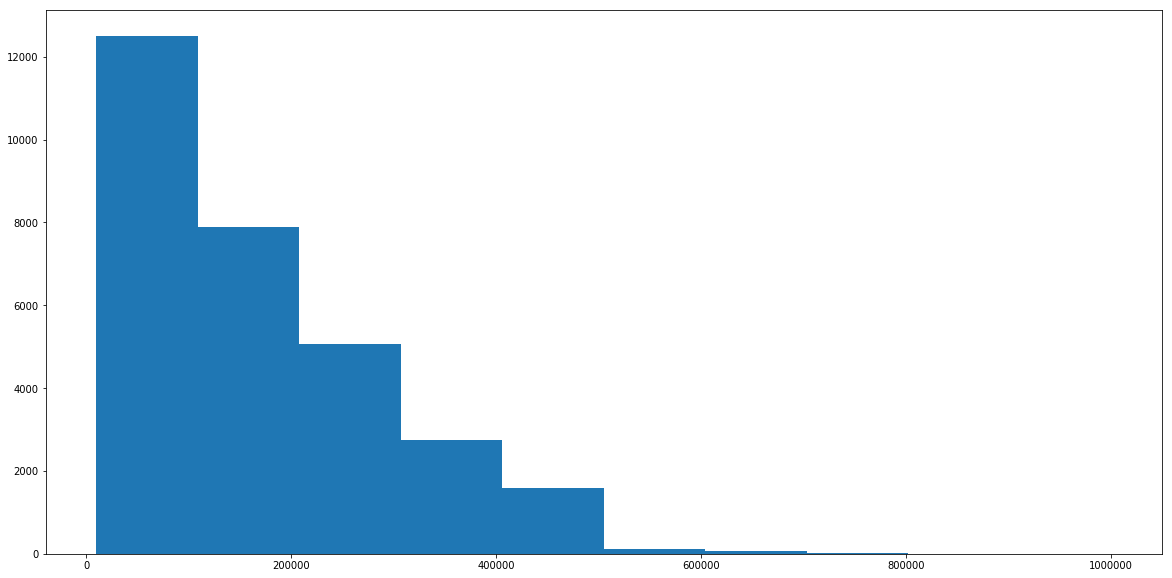

In [12]:
histogram(data.LIMIT_BAL)

### Variable 3 - `SEX`

In [13]:
data.SEX = data.SEX.apply(str)

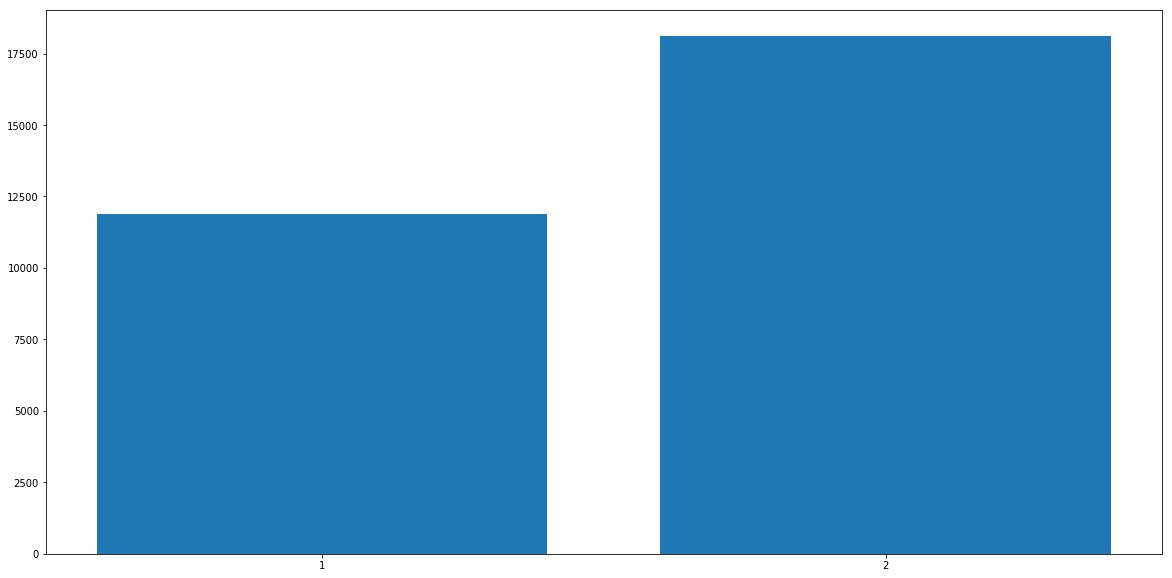

In [14]:
bar_plot(data.SEX)

### variable 4 - `EDUCATION`

In [15]:
data.EDUCATION = data.EDUCATION.apply(str)

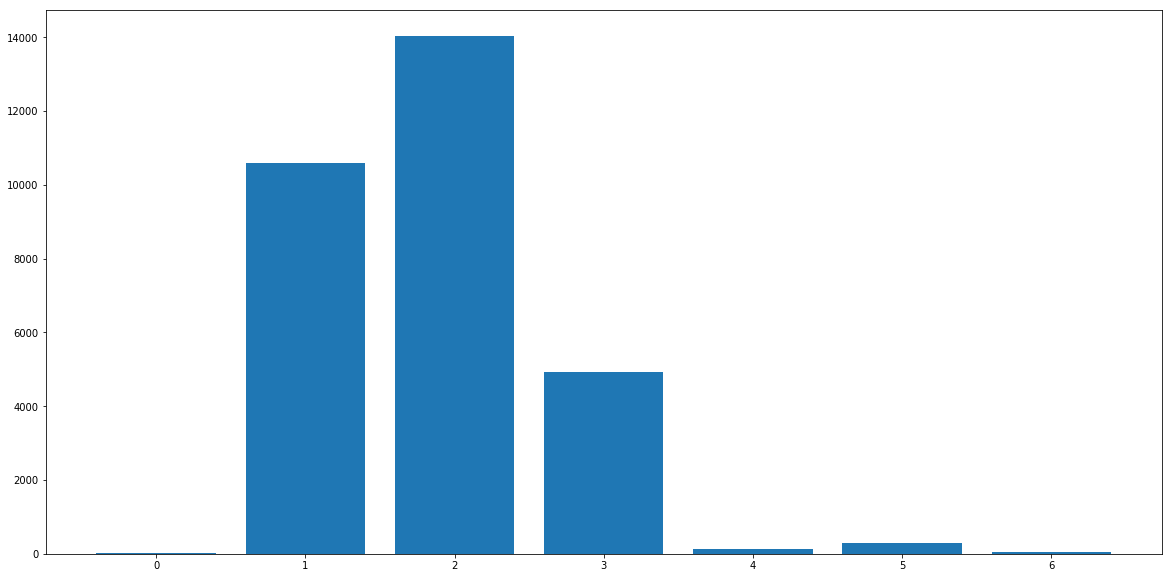

In [16]:
bar_plot(data.EDUCATION)

### variable 5 - `MARRIAGE`

In [17]:
data.MARRIAGE = data.MARRIAGE.apply(str)

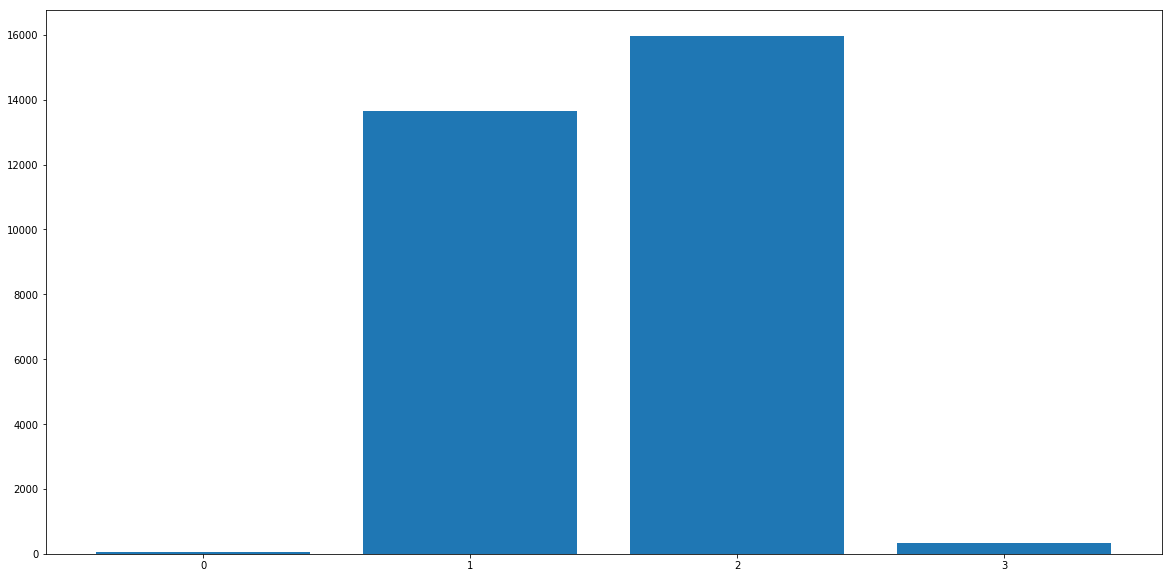

In [18]:
bar_plot(data.MARRIAGE)

### variable 6 - `AGE` 

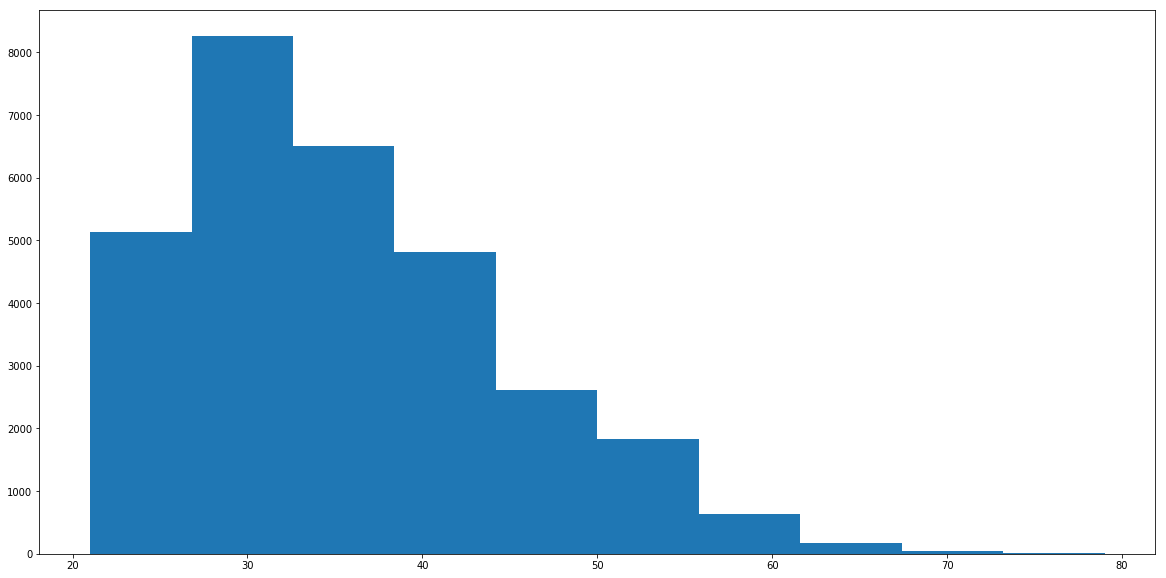

In [19]:
histogram(data.AGE)

### variable 7 - 11 - `PAY_0`, `PAY_2`, `PAY_3`, `PAY_4`, `PAY_5`, `PAY_6`

In [20]:
data.PAY_0 = data.PAY_0.apply(str)
data.PAY_2 = data.PAY_2.apply(str)
data.PAY_3 = data.PAY_3.apply(str)
data.PAY_4 = data.PAY_4.apply(str)
data.PAY_5 = data.PAY_5.apply(str)
data.PAY_6 = data.PAY_6.apply(str)

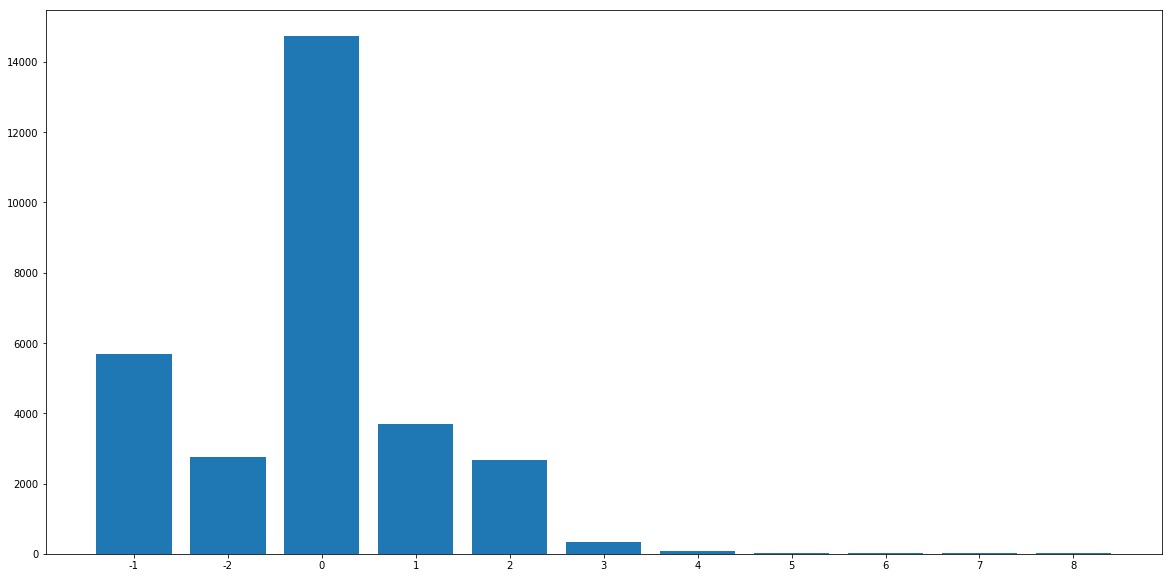

In [21]:
bar_plot(data.PAY_0)

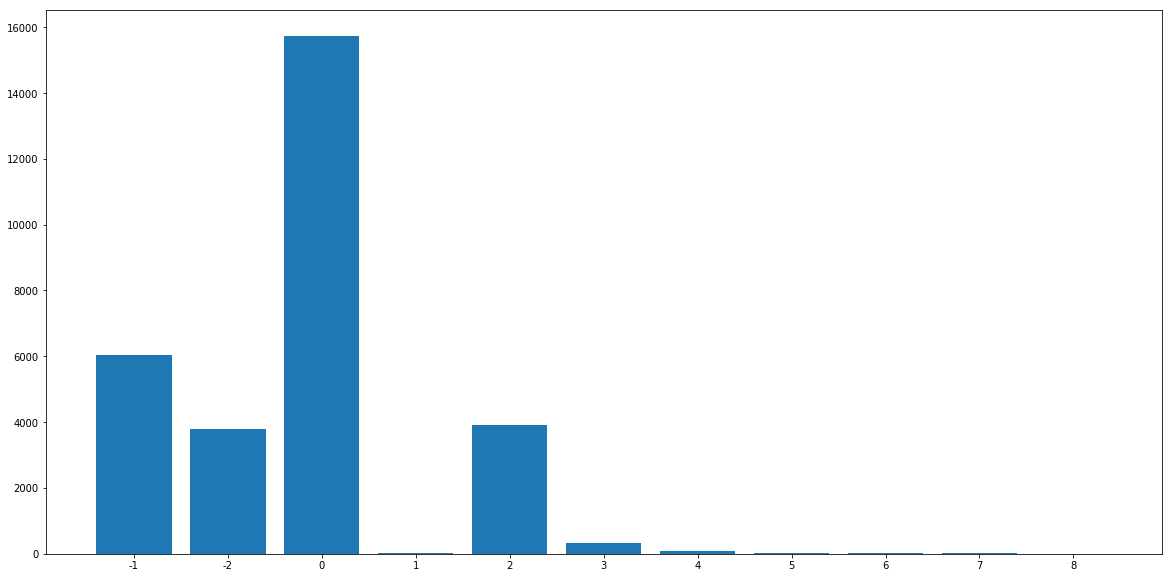

In [22]:
bar_plot(data.PAY_2)

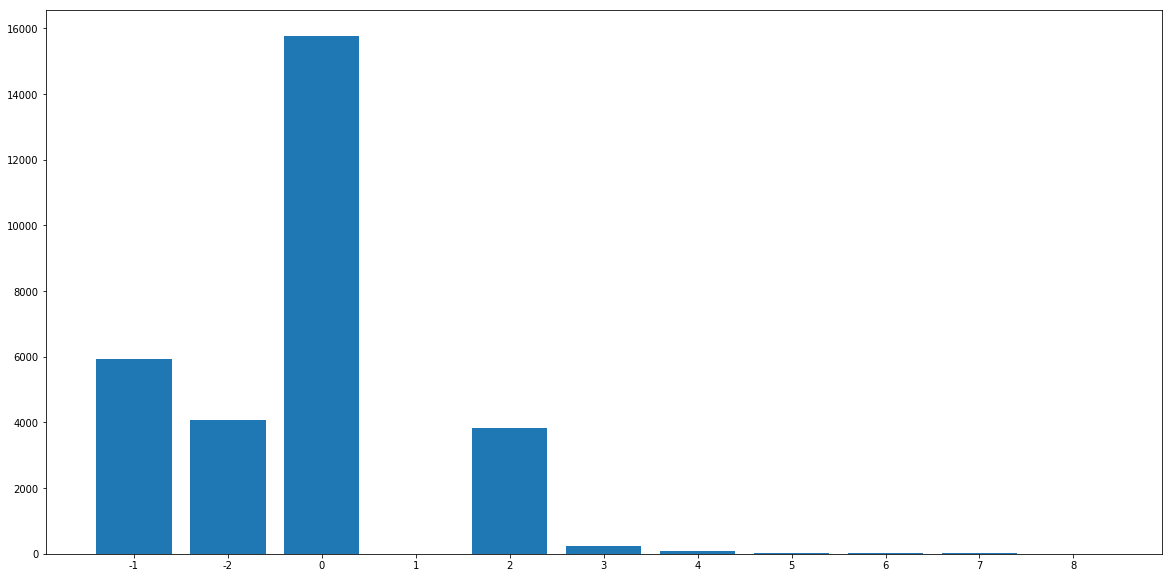

In [23]:
bar_plot(data.PAY_3)

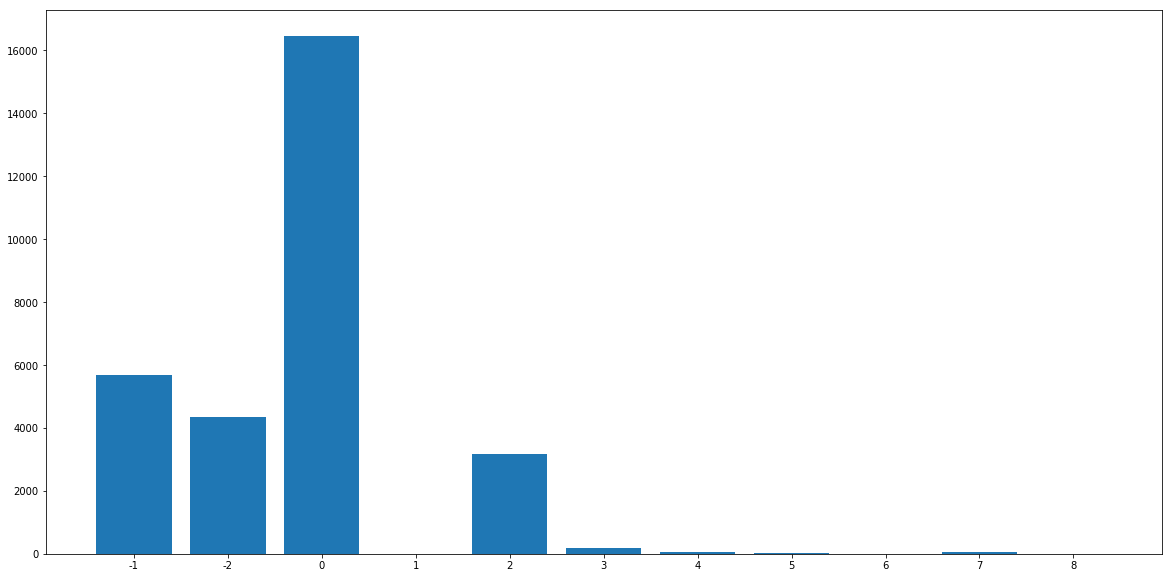

In [24]:
bar_plot(data.PAY_4)

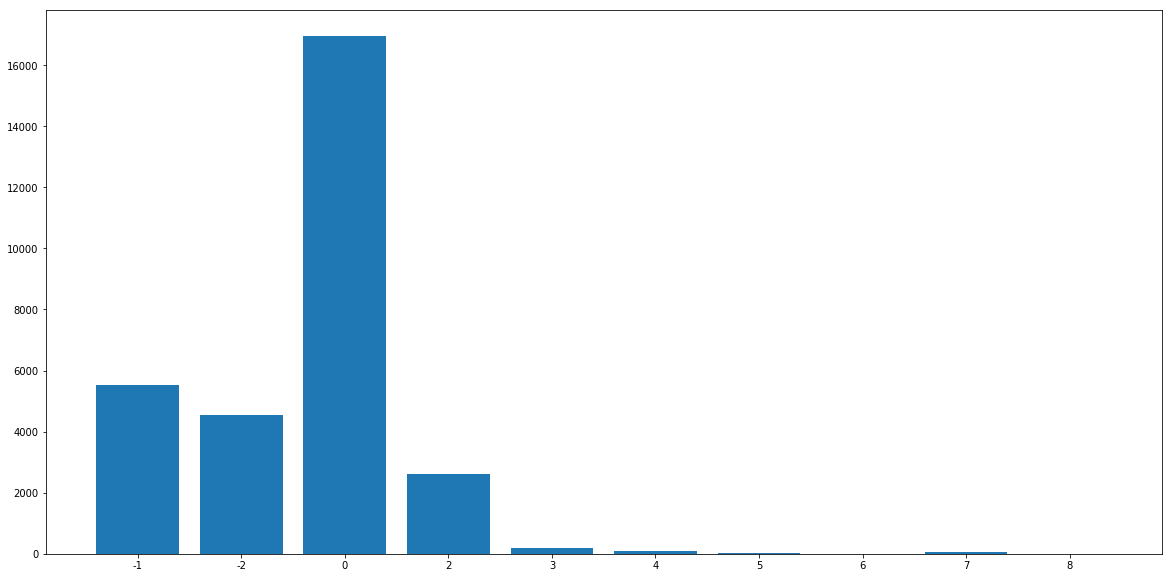

In [25]:
bar_plot(data.PAY_5)

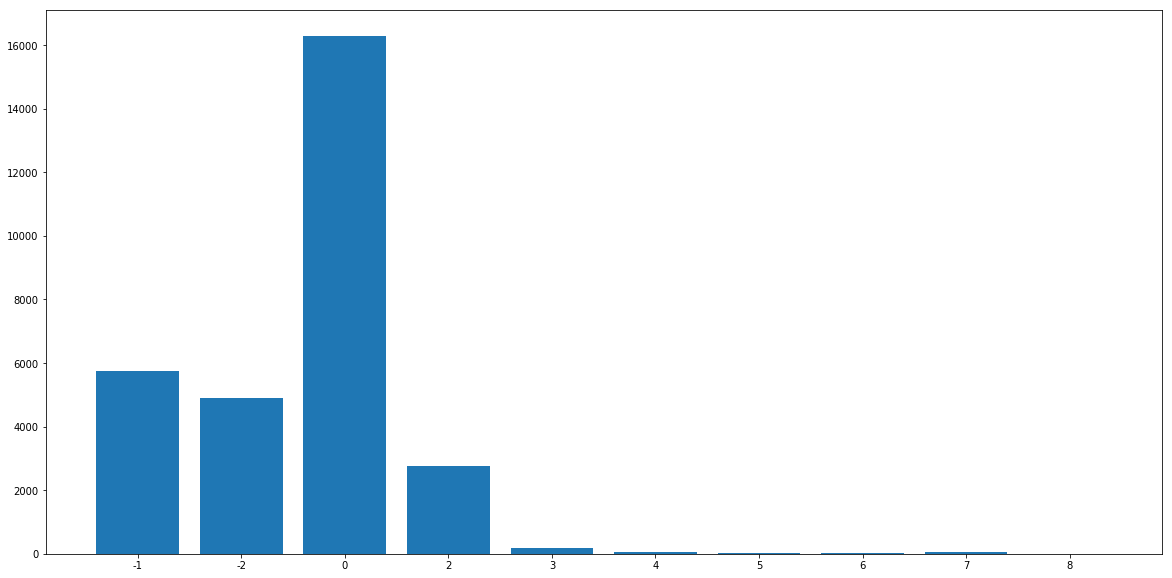

In [26]:
bar_plot(data.PAY_6)

In [27]:
col_name = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 
           'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
cat_unique = find_unique(data, col_name)

In [28]:
cat_unique

,colname,nunique
0,SEX,2
1,EDUCATION,7
2,MARRIAGE,4
3,PAY_0,11
4,PAY_2,11
5,PAY_3,11
6,PAY_4,11
7,PAY_5,10
8,PAY_6,10


## EDA - 12-25 variables

In [29]:
data.iloc[:,11:25].head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,
1,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [30]:
data.rename(columns = {'default.payment.next.month': 'DEFAULT'}, inplace = True)

In [31]:
data.iloc[:,11:25].describe(include = "all")

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [32]:
data.DEFAULT = data.DEFAULT.apply(str)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null float64
SEX          30000 non-null object
EDUCATION    30000 non-null object
MARRIAGE     30000 non-null object
AGE          30000 non-null int64
PAY_0        30000 non-null object
PAY_2        30000 non-null object
PAY_3        30000 non-null object
PAY_4        30000 non-null object
PAY_5        30000 non-null object
PAY_6        30000 non-null object
BILL_AMT1    30000 non-null float64
BILL_AMT2    30000 non-null float64
BILL_AMT3    30000 non-null float64
BILL_AMT4    30000 non-null float64
BILL_AMT5    30000 non-null float64
BILL_AMT6    30000 non-null float64
PAY_AMT1     30000 non-null float64
PAY_AMT2     30000 non-null float64
PAY_AMT3     30000 non-null float64
PAY_AMT4     30000 non-null float64
PAY_AMT5     30000 non-null float64
PAY_AMT6     30000 non-null float64
DEFAULT      30000 non-null object
dtypes: float64(13), int64(1), object(1

### Correlation matrix

In [34]:
corr_df = data.select_dtypes(include=[np.number])

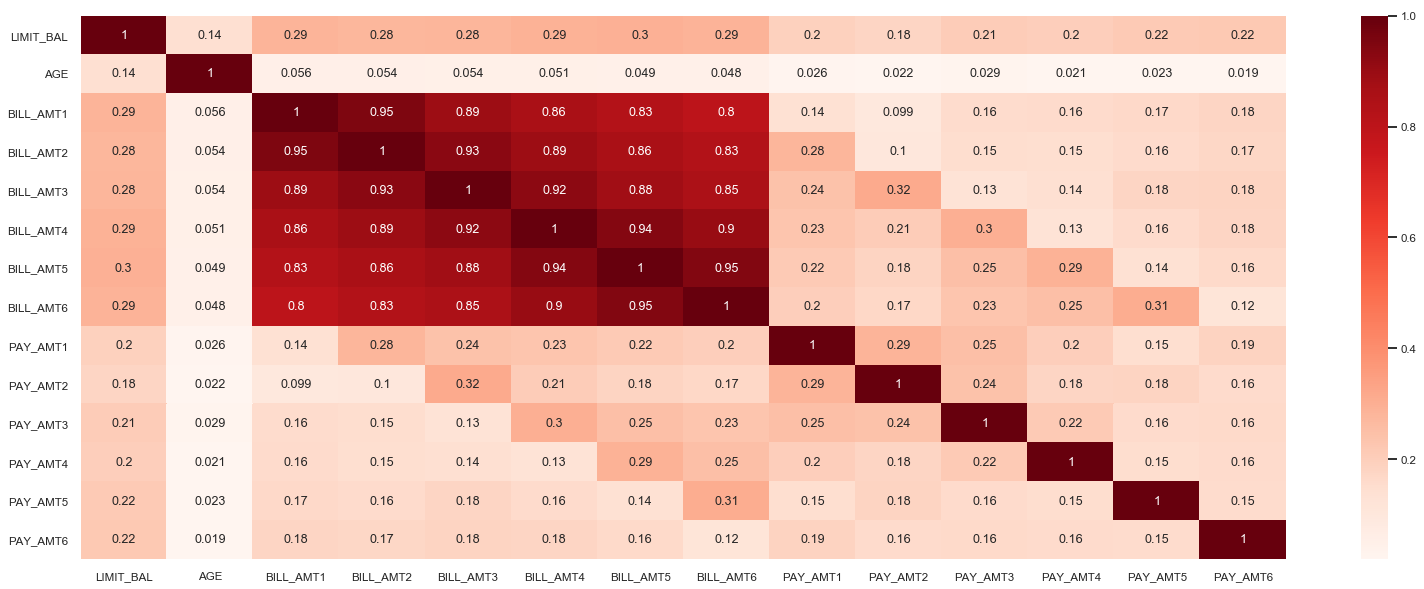

In [35]:
sns.set(rc={'figure.figsize':(27,10)})
sns.set_context("talk", font_scale=0.7)
    
sns.heatmap(corr_df.corr(), cmap='Reds', annot=True);

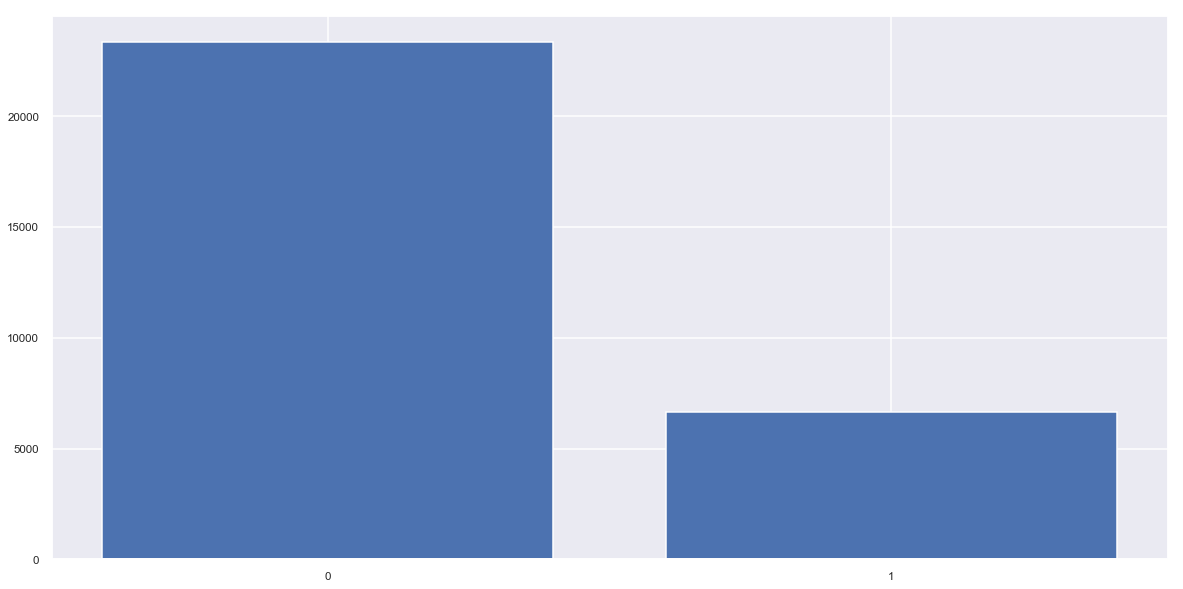

In [36]:
bar_plot(data.DEFAULT)

In [37]:
data.DEFAULT.value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64